# ttH experiment: inference results

## Setup

In [42]:
%matplotlib inline

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
import logging
import corner

sys.path.append("../../")

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Load results

In [43]:
algo_filenames = ["flow_20_tth", "pie_20_tth", "mf_20_tth", "gamf_20_tth", "flow_20_tth2d"]
algo_labels = ["Flow", "PIE", "Manifold flow", "GAMF", "Flow (2D)"]


In [44]:
result_dir = "../data/results"

model_posterior_samples = []
for algo_filename in algo_filenames:
    try:
        model_posterior_samples.append(np.load(
            "{}/{}_model_posterior_samples.npy".format(
                result_dir, algo_filename
            )
        ))
    except FileNotFoundError as e:
        print(e)
        model_posterior_samples.append(np.nan*np.ones((1000,3)))
    
model_posterior_samples = np.asarray(model_posterior_samples)


[Errno 2] No such file or directory: '../data/results/flow_20_tth_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/pie_20_tth_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_20_tth_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/gamf_20_tth_model_posterior_samples.npy'


## Plot data

In [45]:
filename = "../data/samples/tth2d/{}.npy"
x_train = np.load(filename.format("x_train"))[::1000]
params_train = np.load(filename.format("theta_train"))[::1000]
x_test = np.load(filename.format("x_test"))[::10]
    

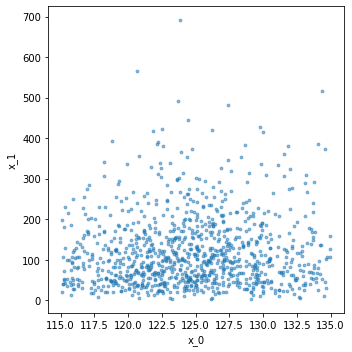

In [46]:
fig = plt.figure(figsize=(5,5))

plt.scatter(x_test[:,0], x_test[:,1], s=8., alpha=0.5, c="C0")

plt.xlabel("x_0")
plt.ylabel("x_1")

plt.tight_layout()
plt.show()

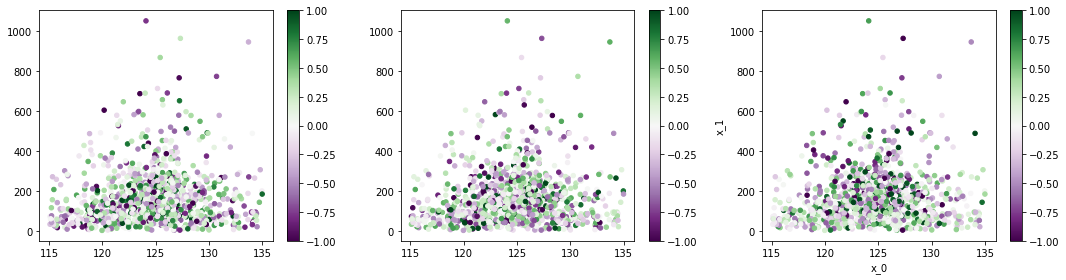

In [47]:
fig = plt.figure(figsize=(15,4))

for i in range(3):
    ax = plt.subplot(1,3,i+1)
    sc = plt.scatter(x_train[:,0], x_train[:,1], s=20., c=params_train[:, i], cmap="PRGn", vmin=-1., vmax=1)
    
    cbar = plt.colorbar(sc)
    
    
plt.xlabel("x_0")
plt.ylabel("x_1")

plt.tight_layout()
plt.show()

## Plot results

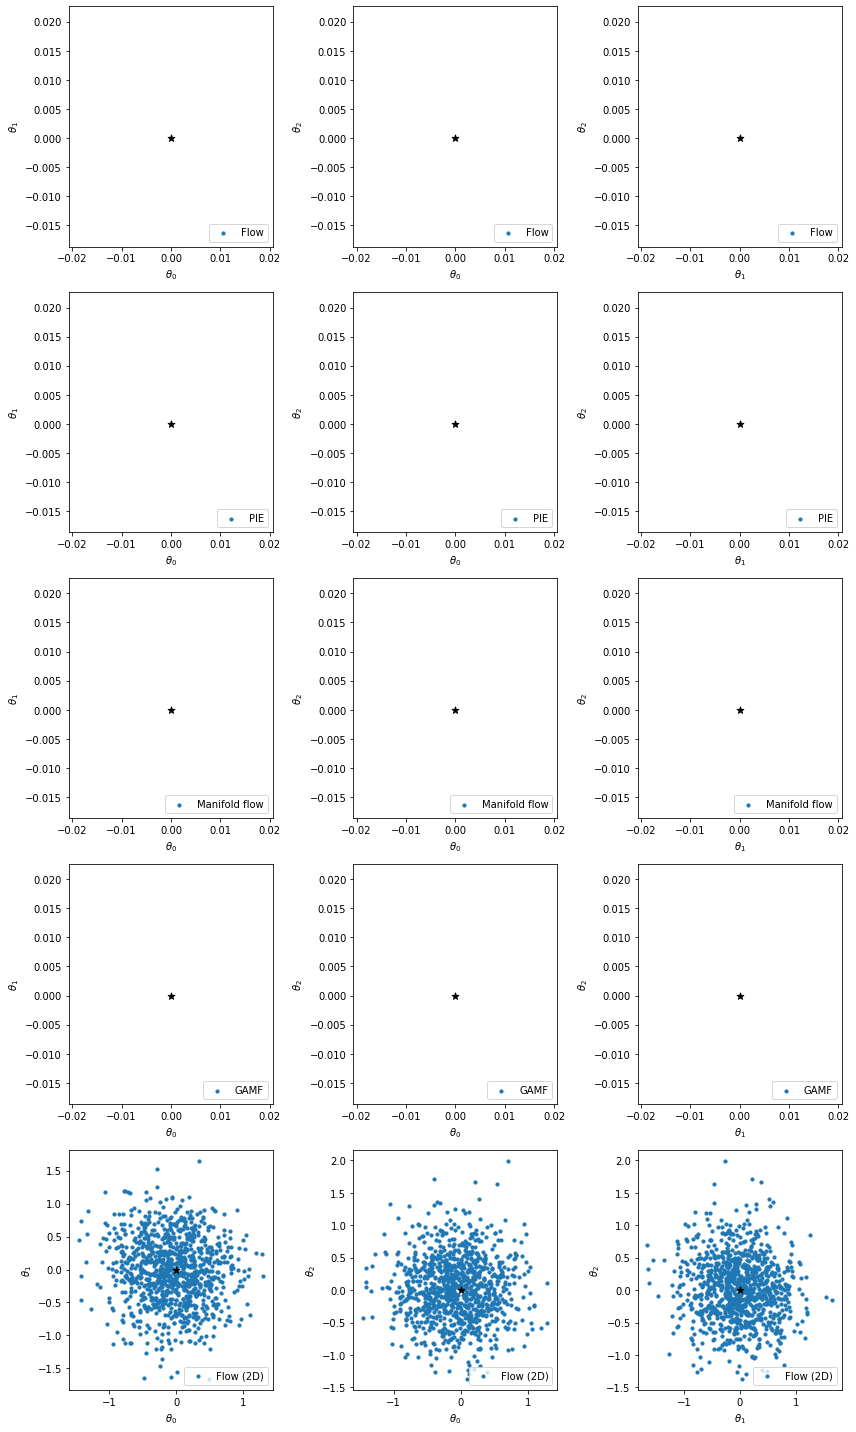

In [48]:
ncols = 3
nrows = len(algo_filenames)

fig = plt.figure(figsize=(ncols*4, nrows*4))

for algo, label in enumerate(algo_labels):
    for i, (ix, iy) in enumerate([(0,1), (0,2), (1,2)]):
        ax = plt.subplot(nrows, ncols, algo*3 + i + 1)
        plt.scatter(model_posterior_samples[algo,:,ix], model_posterior_samples[algo,:,iy], s=10., c="C0", label=label)
        plt.scatter([0.], [0.], s=50, marker="*", c="black")
        plt.legend(loc="lower right")
        
        plt.xlabel(r"$\theta_{}$".format(ix))
        plt.ylabel(r"$\theta_{}$".format(iy))
        #plt.xlim(-1.2,1.2)
        #plt.ylim(-1.2,1.2)
    
plt.tight_layout()
plt.savefig("../figures/posterior_samples_tth.pdf")
